In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

file_path ='dataset/flood-prediction.csv'

df = pd.read_csv(file_path, encoding='ascii', delimiter=',')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(df.head())

        Date     Location  Rainfall_mm  WaterLevel_m  SoilMoisture_pct  \
0 2016-01-01  Quezon City         12.0           0.5              15.3   
1 2016-01-01     Marikina         10.6           1.8              23.2   
2 2016-01-01       Manila          5.7           0.5              15.6   
3 2016-01-01        Pasig          3.7           0.5               5.0   
4 2016-01-02  Quezon City          3.4           0.5              13.3   

   Elevation_m  FloodOccurrence  
0           43                0  
1           15                0  
2            5                0  
3            5                0  
4           43                0  


In [ ]:
df.tail()

,Date,Location,Rainfall_mm,WaterLevel_m,SoilMoisture_pct,Elevation_m,FloodOccurrence
7303,2020-12-30,Pasig,16.9,1.4,16.8,5,0
7304,2020-12-31,Quezon City,7.2,0.7,25.6,43,0
7305,2020-12-31,Marikina,4.8,1.3,9.6,15,0
7306,2020-12-31,Manila,7.4,1.0,11.9,5,0
7307,2020-12-31,Pasig,7.8,1.5,7.3,5,0


In [ ]:
# shape
df.shape

(7308, 7)

In [ ]:
# info of dataset
df.info

<bound method DataFrame.info of            Date     Location  Rainfall_mm  WaterLevel_m  SoilMoisture_pct  \
0    2016-01-01  Quezon City         12.0           0.5              15.3   
1    2016-01-01     Marikina         10.6           1.8              23.2   
2    2016-01-01       Manila          5.7           0.5              15.6   
3    2016-01-01        Pasig          3.7           0.5               5.0   
4    2016-01-02  Quezon City          3.4           0.5              13.3   
...         ...          ...          ...           ...               ...   
7303 2020-12-30        Pasig         16.9           1.4              16.8   
7304 2020-12-31  Quezon City          7.2           0.7              25.6   
7305 2020-12-31     Marikina          4.8           1.3               9.6   
7306 2020-12-31       Manila          7.4           1.0              11.9   
7307 2020-12-31        Pasig          7.8           1.5               7.3   

      Elevation_m  FloodOccurrence  
0     

In [ ]:
# Finding missing values
df.isnull().sum()

Date                0
Location            0
Rainfall_mm         0
WaterLevel_m        0
SoilMoisture_pct    0
Elevation_m         0
FloodOccurrence     0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

Date                0.0
Location            0.0
Rainfall_mm         0.0
WaterLevel_m        0.0
SoilMoisture_pct    0.0
Elevation_m         0.0
FloodOccurrence     0.0
dtype: float64

In [ ]:
# Finding duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# For missing vlaues
numeric_cols = ['Rainfall_mm', 'WaterLevel_m', 'SoilMoisture_pct', 'Elevation_m']
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

In [ ]:
# After cleaning the dataset
df.isnull().sum()

Date                0
Location            0
Rainfall_mm         0
WaterLevel_m        0
SoilMoisture_pct    0
Elevation_m         0
FloodOccurrence     0
dtype: int64

In [ ]:
# To maintain chronological order
df.sort_values(by='Date', inplace=True)

# Reset index after sorting
df.reset_index(drop=True, inplace=True)

In [ ]:
df.describe()

,Date,Rainfall_mm,WaterLevel_m,SoilMoisture_pct,Elevation_m,FloodOccurrence
count,7308,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000
mean,2018-07-02 00:00:00,10.052874,1.266379,15.184989,17.000000,0.018062
min,2016-01-01 00:00:00,0.100000,0.500000,5.000000,5.000000,0.000000
25%,2017-04-01 00:00:00,4.900000,0.500000,10.900000,5.000000,0.000000
50%,2018-07-02 00:00:00,8.400000,1.000000,14.900000,10.000000,0.000000
75%,2019-10-02 00:00:00,13.500000,1.800000,19.100000,22.000000,0.000000
max,2020-12-31 00:00:00,52.700000,6.400000,39.700000,43.000000,1.000000
std,NaN,7.101769,0.902239,5.994044,15.557414,0.133186


In [ ]:
df.describe(include="object")

,Location
count,7308
unique,4
top,Quezon City
freq,1827


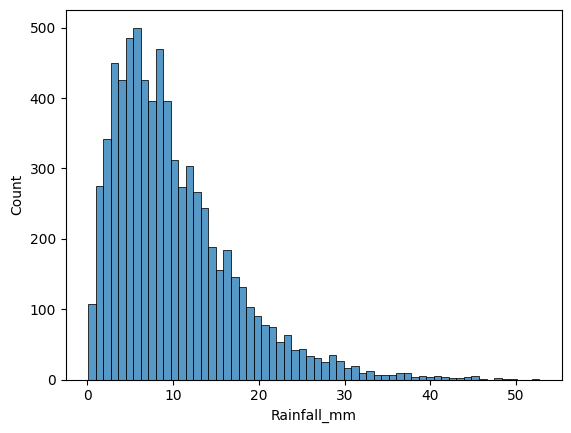

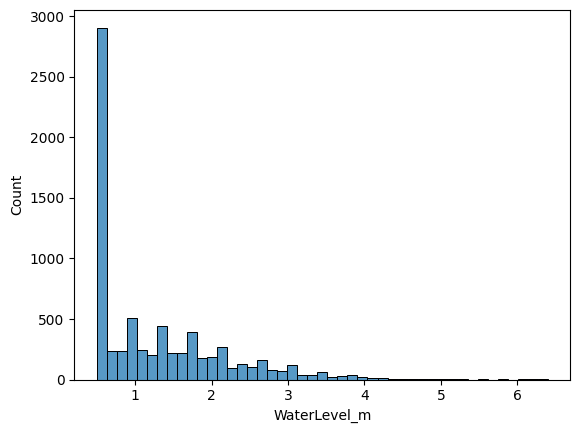

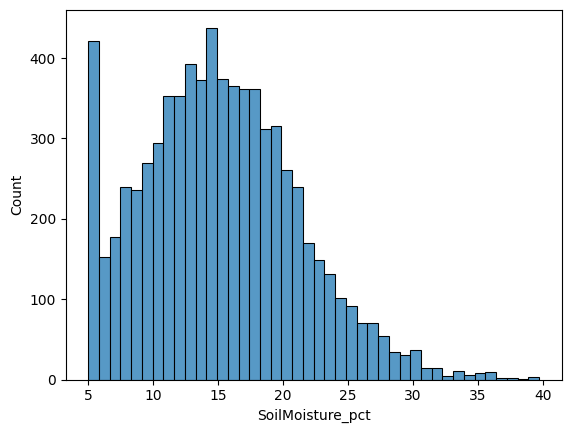

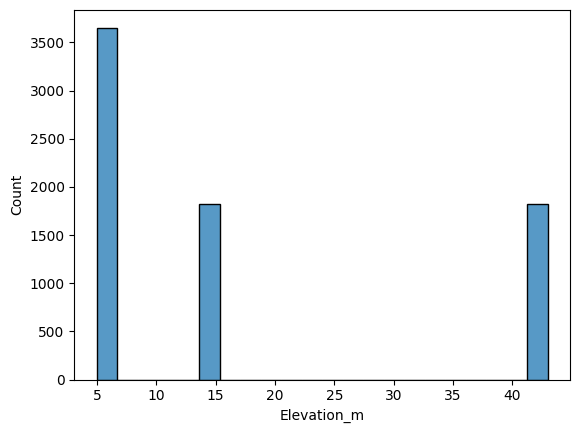

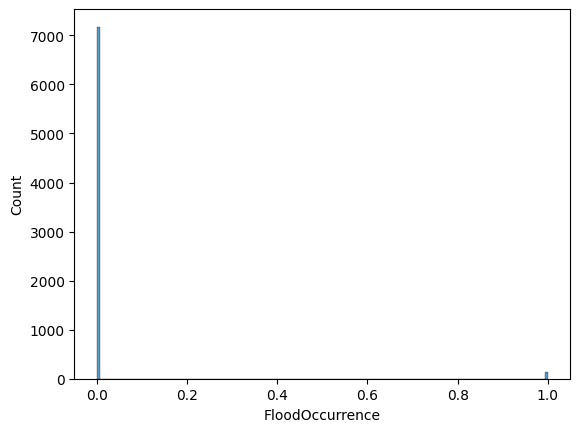

In [ ]:
# Histogram
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

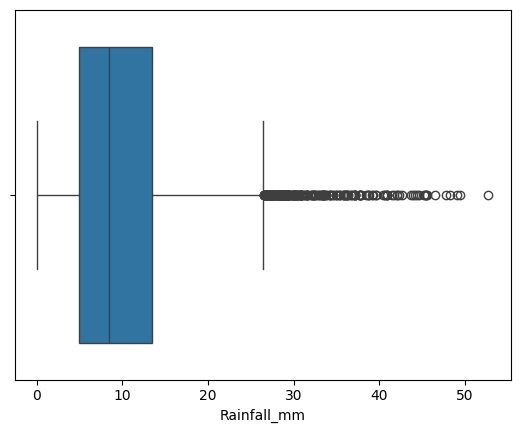

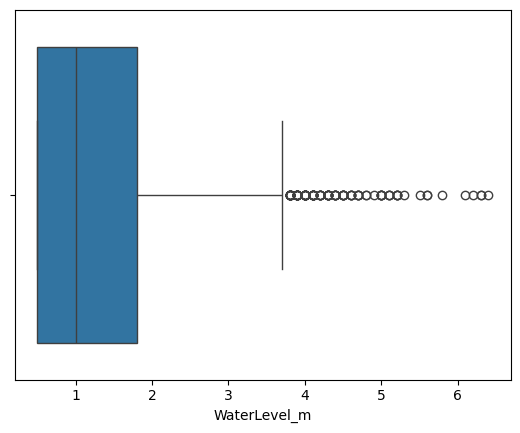

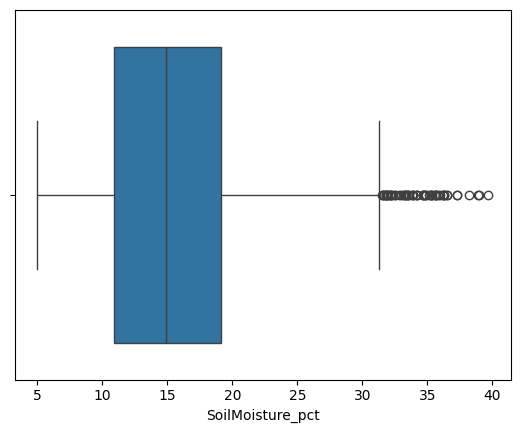

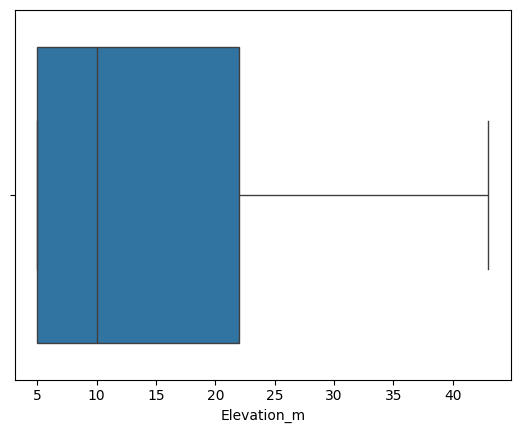

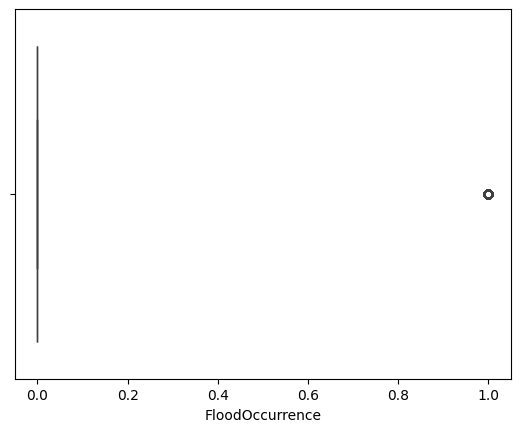

In [ ]:
# Histogram
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

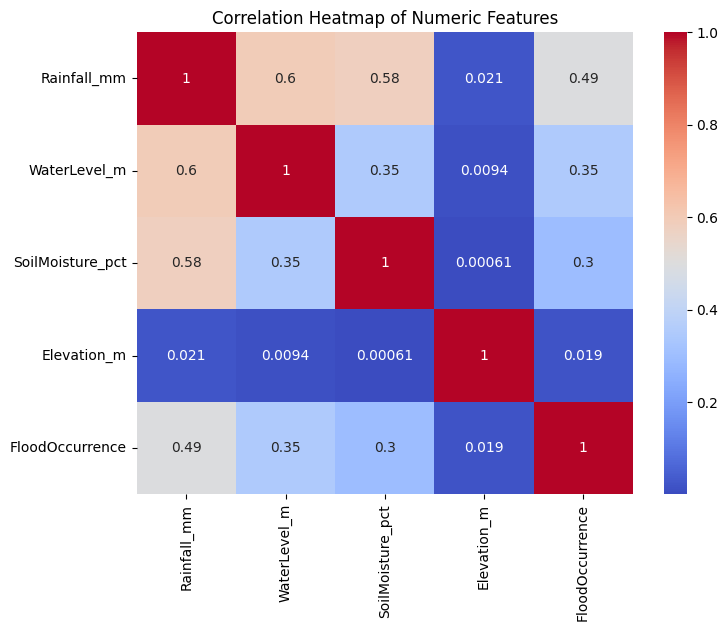

In [ ]:
# orrelation heatmap
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8,6))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

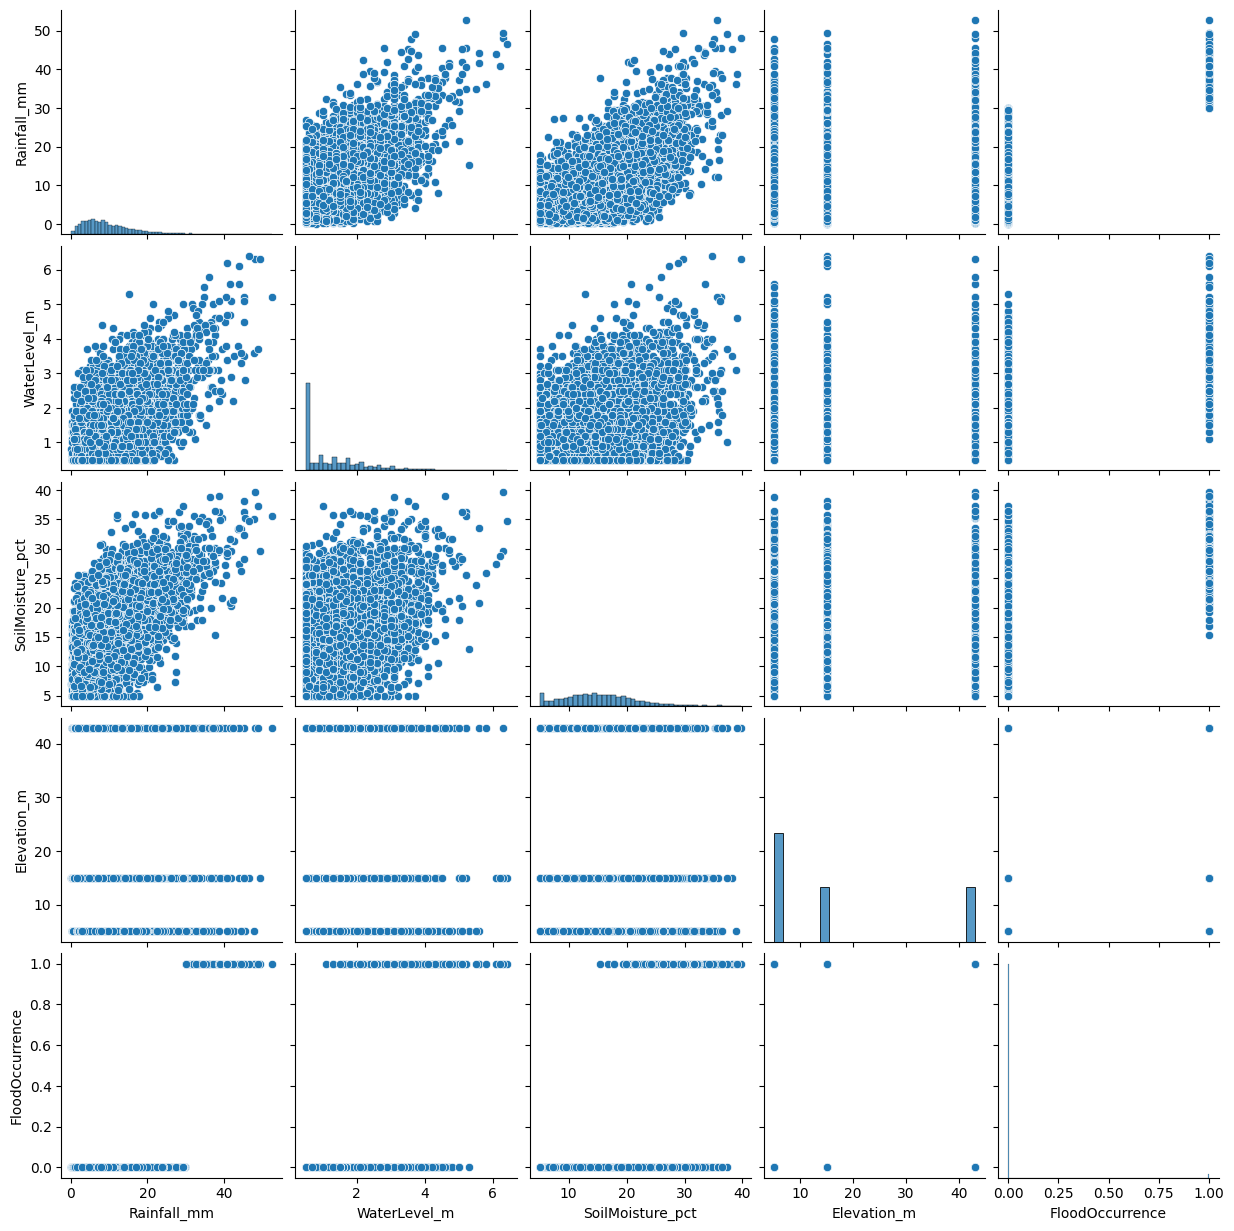

In [ ]:
# Pair plot for numeric features
sns.pairplot(numeric_df)
plt.show()